In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_excel("../dataset/train.csv.xlsx")

# Basic info
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


Understand Data Structure

In [8]:
df.shape


(9800, 18)

In [9]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9800 non-null   int64         
 1   Order ID       9800 non-null   str           
 2   Order Date     9800 non-null   datetime64[us]
 3   Ship Date      9800 non-null   datetime64[us]
 4   Ship Mode      9800 non-null   str           
 5   Customer ID    9800 non-null   str           
 6   Customer Name  9800 non-null   str           
 7   Segment        9800 non-null   str           
 8   Country        9800 non-null   str           
 9   City           9800 non-null   str           
 10  State          9800 non-null   str           
 11  Postal Code    9789 non-null   float64       
 12  Region         9800 non-null   str           
 13  Product ID     9800 non-null   str           
 14  Category       9800 non-null   str           
 15  Sub-Category   9800 non-null   s

Fix Date Columns (CRUCIAL)

In [10]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [11]:
df['Order Year'] = df['Order Date'].dt.year
df['Order Month'] = df['Order Date'].dt.month
df['Order Month Name'] = df['Order Date'].dt.month_name()

Check Missing Values

In [12]:
df.isnull().sum()

Row ID               0
Order ID             0
Order Date           0
Ship Date            0
Ship Mode            0
Customer ID          0
Customer Name        0
Segment              0
Country              0
City                 0
State                0
Postal Code         11
Region               0
Product ID           0
Category             0
Sub-Category         0
Product Name         0
Sales                0
Order Year           0
Order Month          0
Order Month Name     0
dtype: int64

Basic EDA (First Insights)

1. Total Sales

In [13]:
df['Sales'].sum()

np.float64(2261536.7827)

2. Sales by Region

In [14]:
df.groupby('Region')['Sales'].sum().sort_values(ascending=False)

Region
West       710219.6845
East       669518.7260
Central    492646.9132
South      389151.4590
Name: Sales, dtype: float64

3. Sales by Category

In [15]:
df.groupby('Category')['Sales'].sum()

Category
Furniture          728658.5757
Office Supplies    705422.3340
Technology         827455.8730
Name: Sales, dtype: float64

First Visualization (Important!)

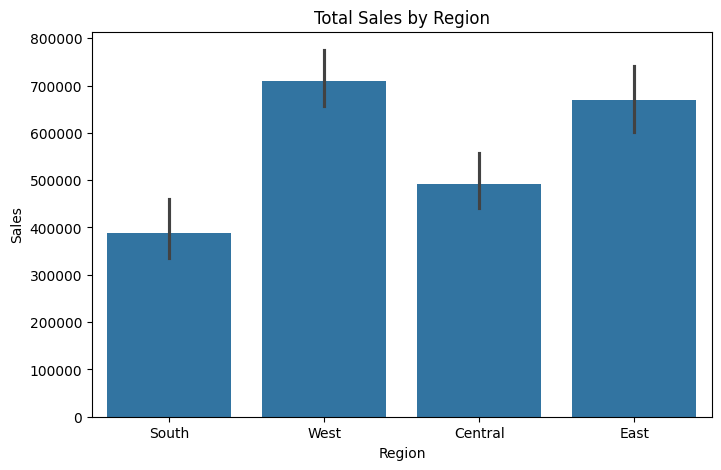

In [16]:
plt.figure(figsize=(8,5))
sns.barplot(x='Region', y='Sales', data=df, estimator=sum)
plt.title("Total Sales by Region")
plt.show()

C:\Users\HEMAHARSAN\AppData\Local\Temp\ipykernel_27540\3030993303.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


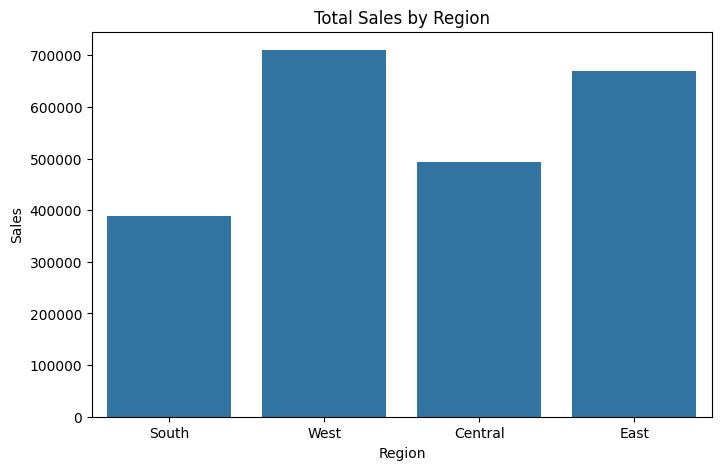

In [17]:
plt.figure(figsize=(8,5))
sns.barplot(
    x='Region',
    y='Sales',
    data=df,
    estimator=sum,
    ci=None
)
plt.title("Total Sales by Region")
plt.show()


In [20]:
import sqlite3

# Connect to SQLite DB
conn = sqlite3.connect("../sql/sales.db")

# Write dataframe to SQL table
df.to_sql("sales_data", conn, if_exists="replace", index=False)

conn.close()